Ryan Turner

# Final Project - Hot hand statistic #

In [4]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from pybaseball.lahman import *
from pybaseball import playerid_reverse_lookup
data = pd.read_csv("ProjectData/statcast2018.csv")
data.head()

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,0,0,SL,2018-10-28,84.0,3.0549,5.2558,Chris Sale,592518.0,519242.0,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
1,1,1,FF,2018-10-28,95.3,3.1661,5.5011,Chris Sale,592518.0,519242.0,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
2,2,2,FF,2018-10-28,96.4,3.0728,5.5353,Chris Sale,592518.0,519242.0,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
3,3,3,CH,2018-10-28,86.6,3.1019,4.9820,Chris Sale,592518.0,519242.0,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
4,4,4,SL,2018-10-28,78.5,3.3075,5.1633,Chris Sale,571771.0,519242.0,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard


In [7]:
def successfulAB(row):
    if (row['events'] == 'home_run')|(row['events'] == 'single')|(row['events'] == 'double')|(row['events'] == 'triple')|(row['events'] == 'sac_fly')|(row['events'] == 'walk'):
        return True
    return False


# Grab only the relevant columns
batterData = data[['index', 'batter', 'events', 'game_date', 'inning']].copy()

# I used the following 20 players they all have over 120 games played in the 2018 season:
players = {571448.0: "Nolan Arenado",
           435622.0: "Ian Desmond",
           596115.0: "Trevor Story",
           453568.0: "Charlie Blackmon",
           609280.0: "Miguel Andújar",
           519317.0: "Giancarlo Stanton",
           643217.0: "Andrew Benintendi",
           502110.0: "J.D. Martinez",
           598265.0: "Jackie Bradley Jr.",
           543063.0: "Brandon Crawford",
           491676.0: "Gorkys Hernández",
           641313.0: "Tim Anderson",
           570560.0: "Yolmer Sánchez",
           600869.0: "Jeimer Candelario",
           595879.0: "Javier Báez",
           546991.0: "Albert Almora",
           519203.0: "Anthony Rizzo",
           641820.0: "Trey Mancini",
           572761.0: "Matt Carpenter",
           500874.0: "José Martínez"}

playerResults = {}
# Loop over each of the players
for key, value in players.items():
    result = []
    print("Data for ", value)
    # Get rid of pitches with no events
    playerData = batterData.loc[(data["batter"]==key)&(data["events"]==data["events"])].copy()

    # Put the at-bats in the correct order so that we can keep track of previous at-bats
    playerData = playerData.sort_values(by=['game_date','inning'])

    # Get the players overall BA as a baseline for comparison. For this BA number, I include sac-fly, and walks because those are "Successful" outcomes.
    totalAB = len(playerData)
    totalSuccess = len(playerData[(playerData['events'] == 'home_run')|(playerData['events'] == 'single')|(playerData['events'] == 'double')|(playerData['events'] == 'triple')|(playerData['events'] == 'sac_fly')|(playerData['events'] == 'walk')])
    
    playerBA = totalSuccess/totalAB
    result.append(playerBA)
    print("Overall batting average: ", playerBA)

    # Get the players BA when the previous at-bat was a hit, walk, or sacrifice fly
    loopIndex = 0
    previousABSuccess = False
    totalABAfterSuccess = 0
    totalSuccessAfterSuccess = 0
    for index, row in playerData.iterrows():
        if loopIndex == 0:
            # Skip the first row since there is no previous AB
            previousABSuccess = successfulAB(row)
            loopIndex += 1
        else:
            # First get if the current AB was a success
            currentAB = successfulAB(row)

            # Track results based on if previous AB was a success or not  
            if previousABSuccess:
                totalABAfterSuccess += 1
                if currentAB:
                    totalSuccessAfterSuccess += 1

            # Set the current AB to be previous AB for the next loop iteration
            previousABSuccess = currentAB

    battingAverageAfter1Success = totalSuccessAfterSuccess / totalABAfterSuccess
    result.append(battingAverageAfter1Success)
    print("Batting Average after 1 successful at-bat: ", battingAverageAfter1Success)

    # Get the players BA when the previous 2 at-bats was a hit, walk, or sacrifice fly
    loopIndex = 0
    previousABSuccess = False
    previous2ABSuccess = False
    totalABAfterSuccess2 = 0
    totalSuccessAfterSuccess2 = 0
    for index, row in playerData.iterrows():
        if loopIndex == 0:
            previous2ABSuccess = successfulAB(row)
            loopIndex += 1
        elif loopIndex == 1:
            previousABSuccess = successfulAB(row)
            loopIndex += 1
        else:
            # First get if the current AB was a success
            currentAB = successfulAB(row)

            # Track results based on if previous AB was a success or not  
            if previousABSuccess and previous2ABSuccess:
                totalABAfterSuccess2 += 1
                if currentAB:
                    totalSuccessAfterSuccess2 += 1

            # Set the previous at-bat to the second previous at-bat and the current at-bat to the previous at-bat
            previous2ABSuccess = previousABSuccess
            previousABSuccess = currentAB

    battingAverageAfter2Success = totalSuccessAfterSuccess2 / totalABAfterSuccess2
    result.append(battingAverageAfter2Success)
    print("Batting Average after 2 successful at-bats: ", battingAverageAfter2Success)


    # Get the players BA when the previous 3 at-bats was a hit, walk, or sacrifice fly
    loopIndex = 0
    previousABSuccess = False
    previous2ABSuccess = False
    previous3ABSuccess = False
    totalABAfterSuccess3 = 0
    totalSuccessAfterSuccess3 = 0
    for index, row in playerData.iterrows():
        if loopIndex == 0:
            previous3ABSuccess = successfulAB(row)
            loopIndex += 1
        elif loopIndex == 1:
            previous2ABSuccess = successfulAB(row)
            loopIndex += 1
        elif loopIndex == 2:
            previousABSuccess = successfulAB(row)
            loopIndex += 1
        else:
            # First get if the current AB was a success
            currentAB = successfulAB(row)

            # Track results based on if previous AB was a success or not  
            if previousABSuccess and previous2ABSuccess and previous3ABSuccess:
                totalABAfterSuccess3 += 1
                if currentAB:
                    totalSuccessAfterSuccess3 += 1

            # Set the previous at-bat to the second previous at-bat and the current at-bat to the previous at-bat
            previous3ABSuccess = previous2ABSuccess
            previous2ABSuccess = previousABSuccess
            previousABSuccess = currentAB

    battingAverageAfter3Success = totalSuccessAfterSuccess3 / totalABAfterSuccess3
    result.append(battingAverageAfter3Success)
    print("Batting Average after 3 successful at-bats: ", battingAverageAfter3Success)

    # Get the players BA when the previous 4 at-bats was a hit, walk, or sacrifice fly
    loopIndex = 0
    previousABSuccess = False
    previous2ABSuccess = False
    previous3ABSuccess = False
    previous4ABSuccess = False
    totalABAfterSuccess4 = 0
    totalSuccessAfterSuccess4 = 0
    for index, row in playerData.iterrows():
        if loopIndex == 0:
            previous4ABSuccess = successfulAB(row)
            loopIndex += 1
        elif loopIndex == 1:
            previous3ABSuccess = successfulAB(row)
            loopIndex += 1
        elif loopIndex == 2:
            previous2ABSuccess = successfulAB(row)
            loopIndex += 1
        elif loopIndex == 3:
            previousABSuccess = successfulAB(row)
            loopIndex += 1
        else:
            # First get if the current AB was a success
            currentAB = successfulAB(row)

            # Track results based on if previous AB was a success or not  
            if previousABSuccess and previous2ABSuccess and previous3ABSuccess and previous4ABSuccess:
                totalABAfterSuccess4 += 1
                if currentAB:
                    totalSuccessAfterSuccess4 += 1

            # Set the previous at-bat to the second previous at-bat and the current at-bat to the previous at-bat
            previous4ABSuccess = previous3ABSuccess
            previous3ABSuccess = previous2ABSuccess
            previous2ABSuccess = previousABSuccess
            previousABSuccess = currentAB
    # Add check because some players never reach this scenario
    if (totalABAfterSuccess4 == 0):
        result.append(-1)
        print("NA")
    else:
        battingAverageAfter4Success = totalSuccessAfterSuccess4 / totalABAfterSuccess4
        
        result.append(battingAverageAfter4Success)
        print("Batting Average after 4 successful at-bats: ", battingAverageAfter4Success)
    playerResults[value] = result



Data for  Nolan Arenado
Overall batting average:  0.36676646706586824
Batting Average after 1 successful at-bat:  0.37142857142857144
Batting Average after 2 successful at-bats:  0.32967032967032966
Batting Average after 3 successful at-bats:  0.4
Batting Average after 4 successful at-bats:  0.3333333333333333
Data for  Ian Desmond
Overall batting average:  0.2957074721780604
Batting Average after 1 successful at-bat:  0.26881720430107525
Batting Average after 2 successful at-bats:  0.24
Batting Average after 3 successful at-bats:  0.25
Batting Average after 4 successful at-bats:  0.0
Data for  Trevor Story
Overall batting average:  0.3413897280966767
Batting Average after 1 successful at-bat:  0.28
Batting Average after 2 successful at-bats:  0.2857142857142857
Batting Average after 3 successful at-bats:  0.3888888888888889
Batting Average after 4 successful at-bats:  0.42857142857142855
Data for  Charlie Blackmon
Overall batting average:  0.340941512125535
Batting Average after 1 suc

Alright so we now have all of the data that we need for each of the players. The next step is to determine if the data shows evidence that previous successful at-bats have an effect on the players current at-bat. Let's look at a visual representation of the data collected above to get a breakdown of the individual players.

Player:  Nolan Arenado


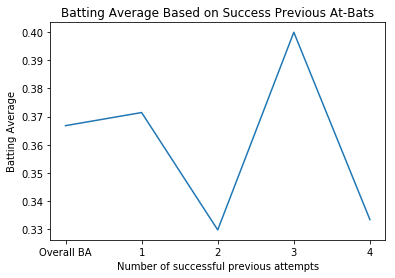

Player:  Ian Desmond


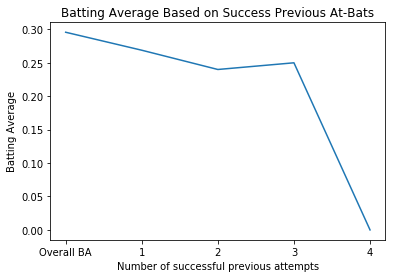

Player:  Trevor Story


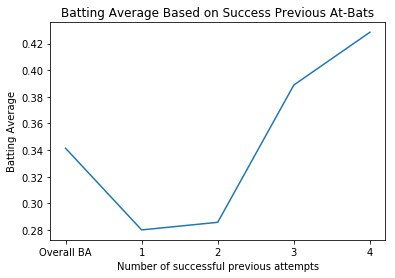

Player:  Charlie Blackmon


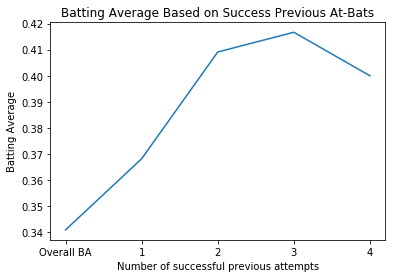

Player:  Miguel Andújar


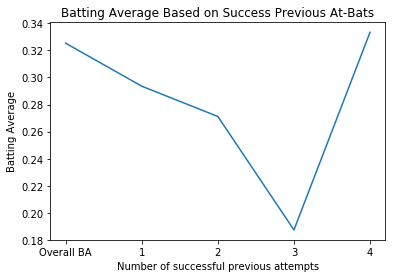

Player:  Giancarlo Stanton


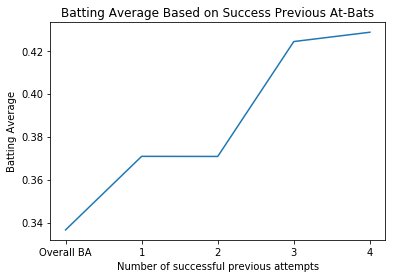

Player:  Andrew Benintendi


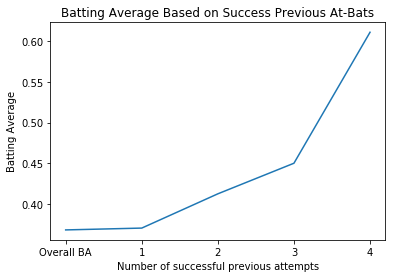

Player:  J.D. Martinez


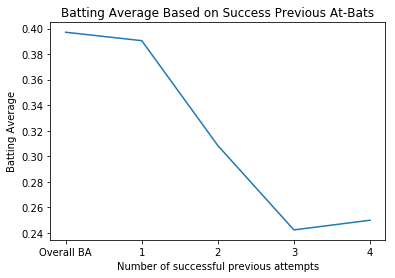

Player:  Jackie Bradley Jr.


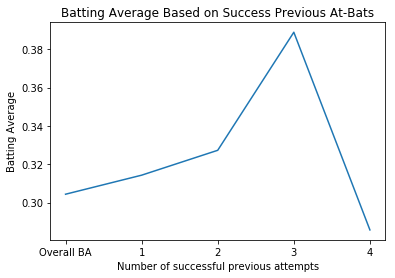

Player:  Brandon Crawford


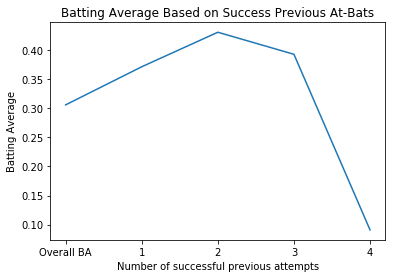

Player:  Gorkys Hernández


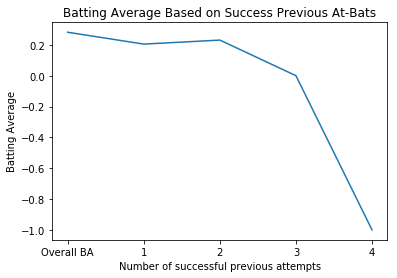

Player:  Tim Anderson


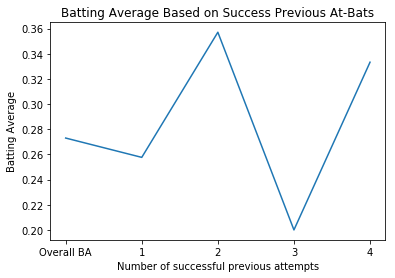

Player:  Yolmer Sánchez


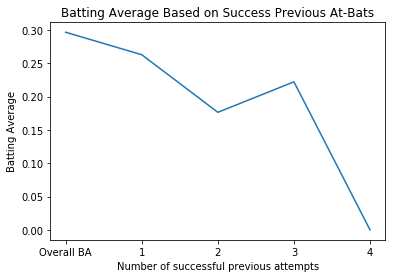

Player:  Jeimer Candelario


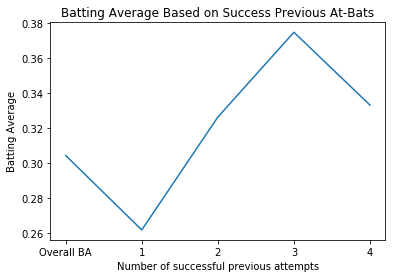

Player:  Javier Báez


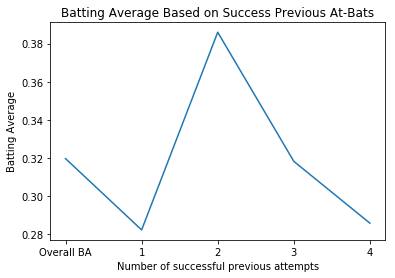

Player:  Albert Almora


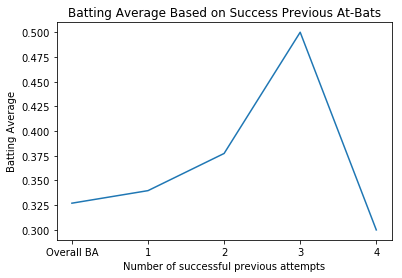

Player:  Anthony Rizzo


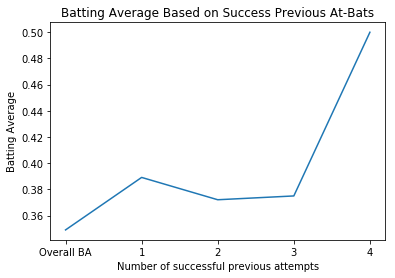

Player:  Trey Mancini


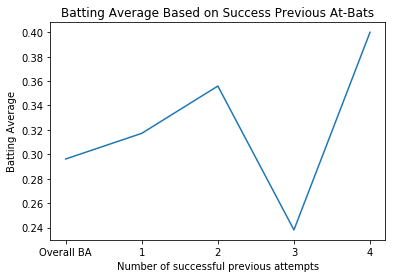

Player:  Matt Carpenter


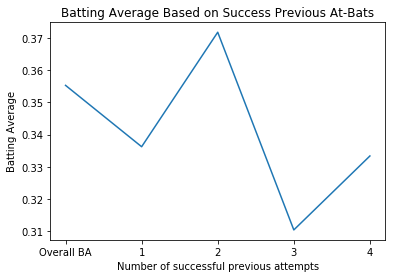

Player:  José Martínez


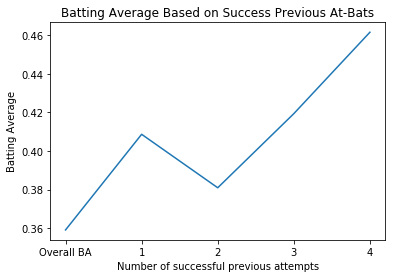

In [8]:
import numpy as np
import matplotlib.pyplot as plt

for key, value in playerResults.items():
    print("Player: ", key)
    x = [0,1,2,3,4]
    y = value
    plt.plot(x, y)
    plt.xticks(np.arange(5), ('Overall BA', '1', '2', '3', '4'))
    plt.title('Batting Average Based on Success Previous At-Bats')
    plt.xlabel('Number of successful previous attempts')
    plt.ylabel('Batting Average')
    plt.show()

These visualizations show that players tend to be a bit of a mixed bag when it comes to how previous successful attempts effect their current at-bat. Some players do worse and worse, the more consecutive at-bats they have had in a row, some do better and better, and then some fluctuate back and forth depending on the number of successful previous attempts. This will be good for the following section where I calculate the hot-hand statistic for each player as the value of the statistic should vary between the players. One thing that can be gathered from the graphs and data is that some players show definite signs of having a "hot-hand" such as Charlie Blackmon, Giancarlo Stanton, and Anthony Rizzo. All of them had a significantly better batting average if they have at least 1 successful previous at-bat.

# Hot hand stat #

I have decided to calculate a players individual hot hand statistic by calculating the difference between the players overall batting average and their batting average after n consecutive successful at-bats and then multiply the difference by n, since the more consecutive successful at-bats imply a "hotter hand" in the sense that they are more heavily influenced by past at-bats. Note that I am using a modified AB stat which includes sac-flies and walks as I consider these to be successful.

$$\text{Hot Hand (HH)} = 1 * (\text{BA after 1 successful AB - Overall BA}) + 2 * (\text{BA after 2 successful AB - Overall BA}) + 3 * (\text{BA after 3 successful AB - Overall BA}) + 4 * (\text{BA after 4 successful AB - Overall BA})$$

In [9]:
for key, value in playerResults.items():
    print("Player: ", key)
    overallBA = value[0]
    # If there was no data for the fourth data point, just set it as the overall BA so it doesn't affect the stat
    if (value[4] == -1):
        value[4] = overallBA
    hotHand = (value[1] - overallBA) + (2 * (value[2] - overallBA)) + (3 * (value[3] - overallBA)) + (4 * (value[4] - overallBA))
    print("Hot Hand (HH): ", hotHand, "\n")

Player:  Nolan Arenado
Hot Hand (HH):  -0.1035621065561183 

Player:  Ian Desmond
Hot Hand (HH):  -1.4582575174795291 

Player:  Trevor Story
Hot Hand (HH):  0.31848367141418504 

Player:  Charlie Blackmon
Hot Hand (HH):  0.6269675337465523 

Player:  Miguel Andújar
Hot Hand (HH):  -0.5206886314682965 

Player:  Giancarlo Stanton
Hot Hand (HH):  0.73336044802333 

Player:  Andrew Benintendi
Hot Hand (HH):  1.309640439220393 

Player:  J.D. Martinez
Hot Hand (HH):  -1.2364083866692446 

Player:  Jackie Bradley Jr.
Hot Hand (HH):  0.2348767174854129 

Player:  Brandon Crawford
Hot Hand (HH):  -0.2842657342657341 

Player:  Gorkys Hernández
Hot Hand (HH):  -1.0233158429816775 

Player:  Tim Anderson
Hot Hand (HH):  0.17496950131904043 

Player:  Yolmer Sánchez
Hot Hand (HH):  -1.6838664151937137 

Player:  Jeimer Candelario
Hot Hand (HH):  0.327824037521434 

Player:  Javier Báez
Hot Hand (HH):  -0.0446918918597865 

Player:  Albert Almora
Hot Hand (HH):  0.5240203193033384 

Player:  Ant

The results above show each individual players hot hand stat. Note that the closer that the value is to zero, the less that a player is positively or negatively affected by their previous at-bats. The more positive the number, the more a player benefits from having successful previous at-bats and the more negative the number, the more adversely the player is affected by having successful previous at-bats. From the selected players, the ones with the hottest hands are Andrew Benintendi (1.31), Anthony Rizzo (0.77), and Giancarlo Stanton (0.73). The ones with the worst hot hands (Cold hands?) are Ian Desmond (-1.45), Yolmer Sanchez (-1.68), and J.D. Martinez (-1.23).